# Credit Card Fraud Detection - EDA

This is a dataset sourced from Kaggle via https://www.kaggle.com/mlg-ulb/creditcardfraud. There data set contains credit card user data together with a binary target, being positive for fraudulent activity whilst being negative for non-fraudulent activity. The kaggle webpage already points out two points:

* Since the data is based on real life numerical data, a PCA transformation has already been implemented to distort (and possibly improve) the data.

* As is the case with datasets much like this one - the amount of non-fraduelent data points far outweighs the amount of fraduelent data points.

This notebook will include a short EDA level investigation into the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import src

In [2]:
filename = 'data/creditcard.csv'
source = pd.read_csv(filename)

### What do we have?

In [3]:
data = source.copy()
data.shape

(284807, 31)

In [4]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [5]:
PCA_transformed_columns = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9','V10','V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20','V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']

data[PCA_transformed_columns].describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05
mean,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,2.239751e-15,...,1.039817e-15,6.406703e-16,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,...,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,...,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,...,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,...,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,...,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,...,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01


Are the any nulls

In [6]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
Numerical = ['Time','V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']

data[Numerical].describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,6.406703e-16,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000


### EDA Plan

We begin the EDA with the plan:

1. Check correlations amoung data
2. Understanding the bias
3. Under the time dependence
4. Outlier analysis

#### Correlation

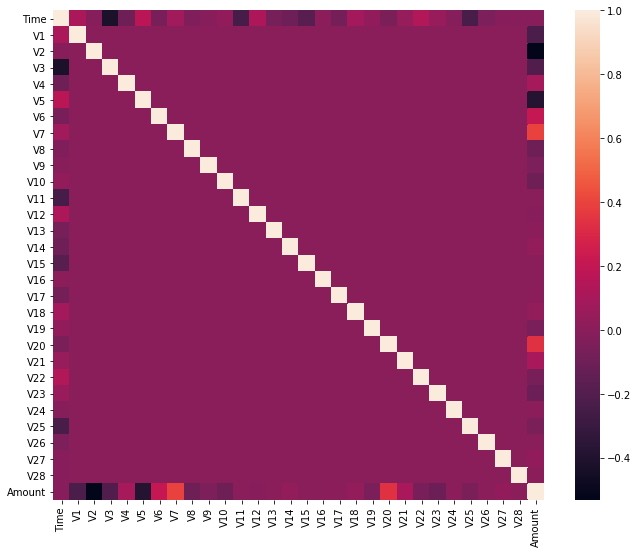

In [8]:
Numerical = ['Time','V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']

corr = data[Numerical].corr()
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr)

So, here we see that V2, V5 negatively correlate with Amount. Time negativly correlated with V3, V11 and V25.

In [9]:
data[['V2','V5','Amount']].corr()

,V2,V5,Amount
V2,1.000000e+00,-2.039868e-16,-0.531409
V5,-2.039868e-16,1.000000e+00,-0.386356
Amount,-5.314089e-01,-3.863563e-01,1.000000


#### Bias

[284315.    492.]


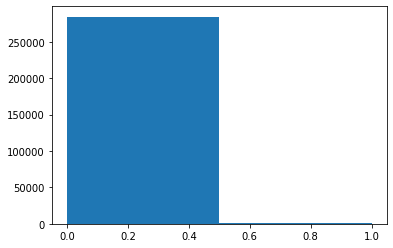

In [10]:
target = data['Class'].values
amount = plt.hist(target, bins = 2)
print(amount[0])


As expected there are overwhelingly many more non-fraudulent cases, which will heavily skew any modelling we attempt to do.

Question : which columns have statisitically different distributions dependenet upon where the target is positive or negatives?

In [11]:
def get_KS(column, alpha = 0.05):
    data0 = data[data['Class'] == 0][column].values
    data1 = data[data['Class'] == 1][column].values
    stat,pval, reject_H0 = src.KolmogorovSmirnov(data0, data1, alpha)
    return stat,pval, reject_H0
    
columns = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']
ks = list(map(get_KS, columns))
KS_values = pd.DataFrame(ks, columns = ['KS statisitic','p-value','Reject?'], index = columns)
KS_values

,KS statisitic,p-value,Reject?
V1,0.475331,8.195257e-97,True
V2,0.633201,1.800351e-171,True
V3,0.703682,1.144588e-211,True
V4,0.766404,5.276425e-251,True
V5,0.436442,1.096421e-81,True
V6,0.486425,2.300023e-101,True
V7,0.660578,1.397676e-186,True
V8,0.368395,2.535885e-58,True
V9,0.576320,4.033562e-142,True
V10,0.804291,2.164418e-276,True


So we see that for many columns aside from V22 there is evidence to reject the null hypothesis according to the Kolmogoroc-Smirnov 2 sample test. This implies that the disitributions of the same feature are difference if the corresponding target is positive or negative.

Question : Can we visualise the distirbutional differences?
Let's do this for the lowest three p-values and then the highest three.

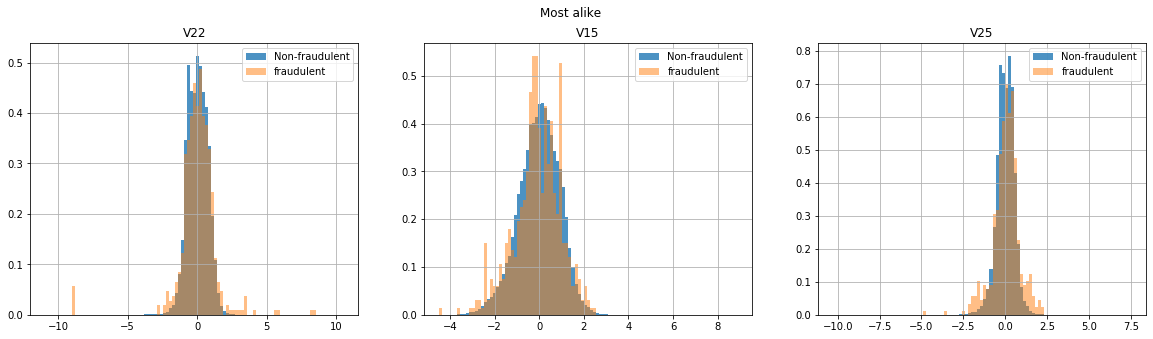

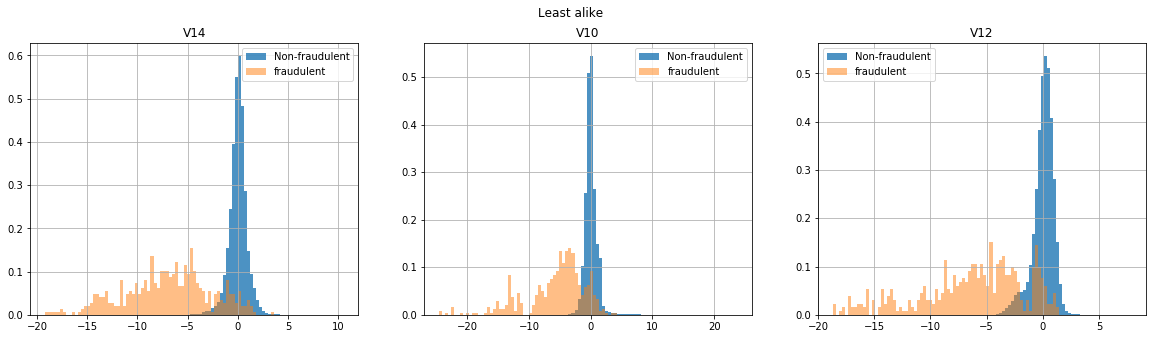

In [13]:
def plot_three(data, indices,suptitle):
    fig, axs = plt.subplots(1,3, figsize = (20,5))
    fig.suptitle(suptitle)
    for i,v in enumerate(indices):
        data0 = data[data['Class'] == 0][v].values
        data1 = data[data['Class'] == 1][v].values

        l = min(min(data0), min(data1))
        r = max(max(data0), max(data1))

        bins = np.linspace(l,r,100)

        axs[i].hist(data0, bins = bins, alpha = 0.8, label = 'Non-fraudulent', density = True)
        axs[i].hist(data1, bins = bins, alpha = 0.5, label = 'fraudulent', density = True)
        axs[i].legend()
        axs[i].grid()
        axs[i].set_title(v)
    plt.show()


lowest_three = KS_values.sort_values('KS statisitic').iloc[:3].index
highest_three = KS_values.sort_values('KS statisitic')[::-1].iloc[:3].index
plot_three(data, lowest_three, 'Most alike')
plot_three(data, highest_three, 'Least alike')

We can see that the for the lowest three - the two distribution are essentially different, they appear to have slightly more skew, lower peak and larger spread. On the other hand the largest three are fairly close. V22 is the columns which the test appears to consider most alike.

We can consider the KS statisic for the purposes of feature engineering, as it is unlikely that those with a very low KS statistic will provide a sufficient difference in the data leading to the target. However - we have not considered correlated data here.

Time dependence

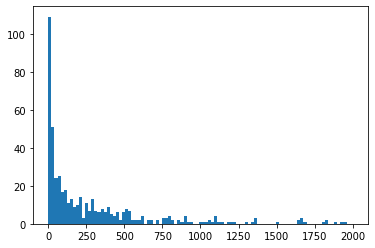

In [17]:
# Time dependence

# how frequent are fraudulent claims...?

times_between_frauds = data[data['Class'] == 1]['Time'].diff().values[1:]
bins = np.linspace(0,2000,100)
res = plt.hist(times_between_frauds, bins = bins)


From this, we can naively say that the fraudulent transaction happen in a temporaly clustered manner, since the distribution of the times between fraudulent transaction is strongly centered positively around zero.

In [ ]:
aaaaa

# Benchmark models and preprocessing

### Benchmarking before any preprocessing

In this section we will do some benchmarking and see how well the very simplest models do before preprocessing. We will then do some preprocessing to account for bias and then finally checking the models again (where we should typically expect some improvements in the relevant metrics). 

### Benchmarking and preprocessing steps

1. Apply simple models, we will use logistic regression - check precision, recall and F1 score.
2. Explore the models feature importance functionalities
3. Introduce undersampling and oversampling to account for bias
4. Reapply the same simple models, check valid metrics and re-explore feature importances.

In [32]:
# first we define a testing panel:

from sklearn import metrics
from sklearn.metrics import precision_recall_curve,roc_curve
from sklearn.metrics import precision_score, recall_score, f1_score, \
accuracy_score, balanced_accuracy_score, roc_auc_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate, StratifiedKFold
from tqdm import tqdm_notebook


def panel_of_tests(y_pred, y_observed):
    tests = [precision_score, recall_score, f1_score,accuracy_score, balanced_accuracy_score, roc_auc_score]
    name = ['Precision','Recall', 'F1', 'Accuracy','Balanced Accuracy','ROC_AUC']
    res = {}
    for i,t in enumerate(tests):
        res[name[i]] = t(y_observed, y_pred)
    return res

def create_plots(y_test, y_proba, title = 'TITLE'):
    fig, axs = plt.subplots(1,2, figsize = (20,5))
    fig.suptitle(title)

    precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

    axs[0].plot(recall, precision)
    axs[0].grid()
    axs[0].set_title('PRECISION_RECALL')

    fpr, tpr, thresholds = roc_curve(y_test, y_proba)

    axs[1].plot(fpr,tpr)
    axs[1].grid()
    axs[1].set_title('ROC_CURVE')
    
def delete_outliers(X, Y, lower = 0.01, upper = 0.99):
    X_cols = ['X'+str(i) for i in range(0,len(X[0]))]
    df = pd.concat([pd.DataFrame(X,columns = X_cols),pd.DataFrame(Y, columns = ['target'])],1)

    for x in X_cols[1:]:
        q_low = df[x].quantile(lower)
        q_hi  = df[x].quantile(upper)
        df = df[(df[x] < q_hi) & (df[x] > q_low)]

    return df[X_cols].values, df['target'].values
    
class cv_modelling(object):
    def __init__(self,xx,yy, folds, sampling_function = None, outlier_function = None):
        """
        Will require an api to a model that can be refit without using previous parameters
        """
        self.xx = xx
        self.yy = yy
        self.folds = folds
        self.sampling_function = sampling_function
        self.outlier_function = outlier_function
        
    def _create_result_df(self):
        model_performance = pd.DataFrame(columns = ['Precision','Recall', 'F1', 'Accuracy','Balanced Accuracy','ROC_AUC'],\
                                    index = np.arange(self.folds))
        
        return model_performance
    
    def _create_model_instance(self, model_string):
        model_string = model_string.split(' ')
        if model_string[0] == 'logistic':
            return LogisticRegression(max_iter = 1000, C = float(model_string[1]))
        if model_string[0] == 'randomforest':
            n_estimators, max_depth = int(model_string[1]), int(model_string[2])
            return RandomForestClassifier(n_estimators = n_estimators, max_depth = max_depth)
    
    def fit(self, model_string, verbose = True):
        models = []
        skf = StratifiedKFold(n_splits = self.folds, shuffle=True)
        skf.get_n_splits(self.xx, self.yy)
        model_performance = self._create_result_df()
        
        for i,indices in enumerate(skf.split(self.xx, self.yy)):
            if verbose:
                print('\r', 'Fold [{}/{}]'.format(i+1,self.folds), end='')
            train_index, test_index = indices
            X_train, X_test = self.xx[train_index], self.xx[test_index]
            y_train, y_test = self.yy[train_index], self.yy[test_index]

            if self.sampling_function is not None:
                X_train, y_train = self.sampling_function(X_train, y_train)

            if self.outlier_function is not None:
                X_train, y_train = self.outlier_function(X_train, y_train)

            model = self._create_model_instance(model_string)
            model.fit(X_train, y_train)

            y_pred = model.predict(X_test)
            tests = panel_of_tests(y_pred, y_test)
            model_performance.iloc[i] = tests
            models.append(model)
        
        model_performance.loc['mean'] = model_performance.mean()
        
        return model_performance, models




In [33]:
from sklearn.linear_model import LogisticRegression

data = source.copy()

Y = data['Class']
X = data
del X['Class']

from sklearn.model_selection import StratifiedKFold
X = X.values
Y = Y.values



In [34]:
cv_model = cv_modelling(X,Y, folds = 5,sampling_function = None, outlier_function = None)
#model = LogisticRegression(max_iter = 1000)
model_performance, models = cv_model.fit('logistic 1')
model_performance

 Fold [5/5]

,Precision,Recall,F1,Accuracy,Balanced Accuracy,ROC_AUC
0,0.810811,0.606061,0.693642,0.99907,0.802907,0.802907
1,0.822785,0.656566,0.730337,0.999157,0.82816,0.82816
2,0.909091,0.510204,0.653595,0.99907,0.755058,0.755058
3,0.898734,0.72449,0.80226,0.999386,0.862175,0.862175
4,0.765432,0.632653,0.692737,0.999034,0.816159,0.816159
mean,0.841371,0.625995,0.714514,0.999143,0.812892,0.812892


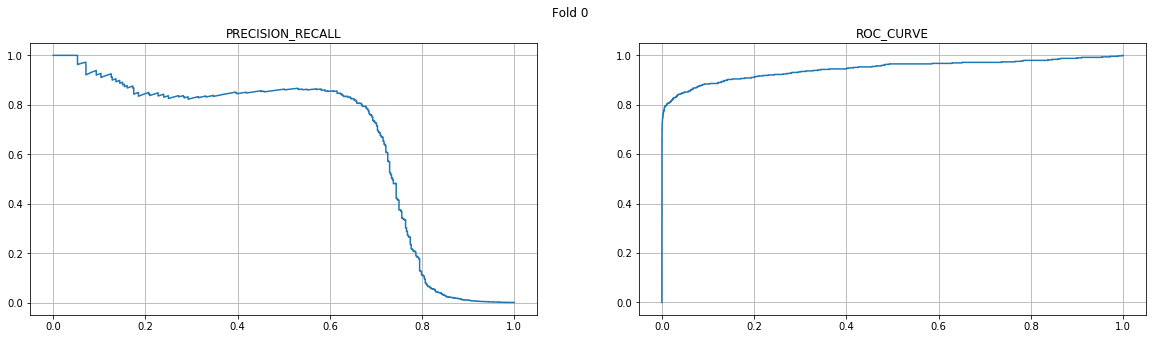

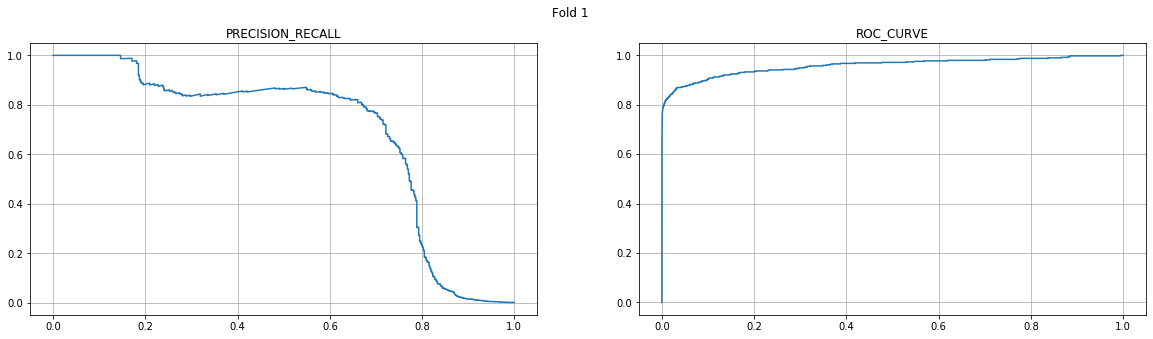

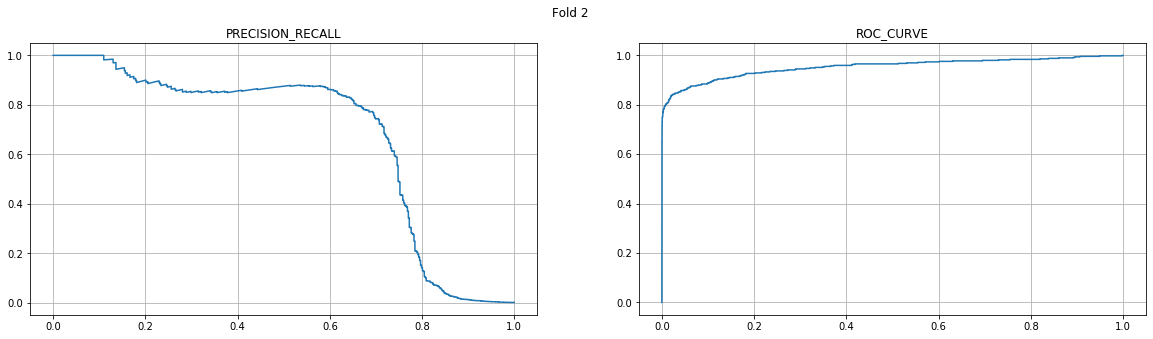

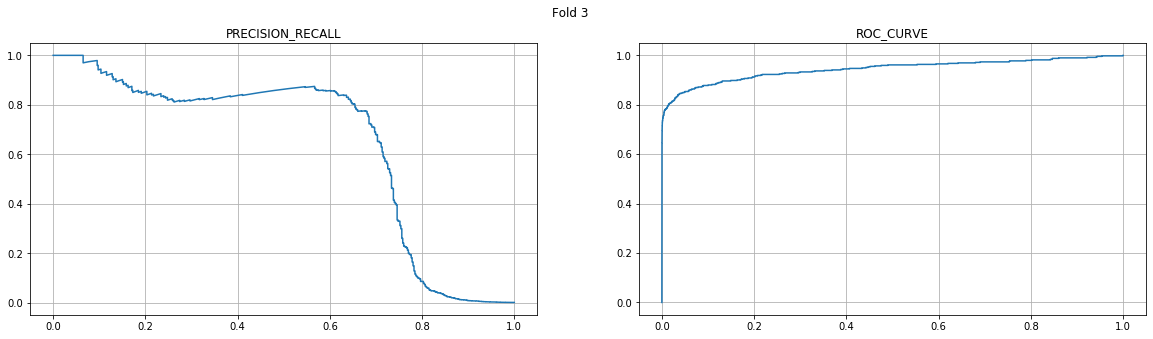

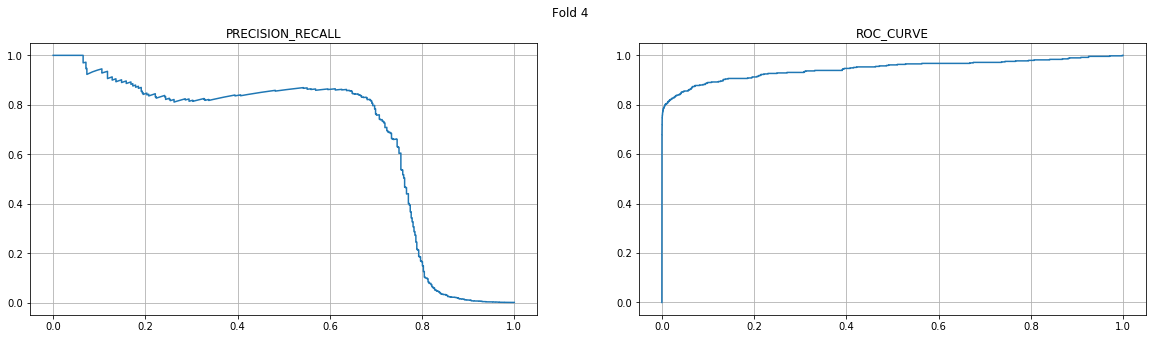

In [35]:
for i in range(0,5):
    create_plots(Y, models[i].predict_proba(X)[:,1], 'Fold' + ' ' + str(i))

As we can see, in both cases, precision is a lot more than recall. This reflects the data imbalance. Note that 

\begin{equation}\begin{aligned} \text{Precesion} = \frac{\text{TP}}{\text{TP}+\text{FP}},\\ \text{Recall} = \frac{\text{TP}}{\text{TP} + \text{FN}} \end{aligned}.\end{equation}

Since, we have many more negative cases than positive, the models are more likley to misclassify positive (y=1) results are negative (y=0) than the other way around. This means that false negatives will tend to be relatively larger than false positives. This makes precision relativly larger then recall.

In [36]:
# feature importances
def extract_importance(columns, feature_importances):
    #features = model.feature_importances_
    idx = np.argsort(abs(feature_importances)).ravel()[::-1]
    return np.array(columns)[idx]

data = {'FOLD_' + str(i): extract_importance(Numerical, models[i].coef_) for i in range(0,5)}

df = pd.DataFrame(data =data)
df

,FOLD_0,FOLD_1,FOLD_2,FOLD_3,FOLD_4
0,V3,V25,V15,V3,V3
1,V7,V15,V25,V7,V7
2,V15,V22,V14,V15,V15
3,V25,V3,V3,V14,V25
4,V14,V21,V22,V25,V14
5,V22,V14,V9,V22,V22
6,V21,V11,V11,V11,V9
7,V11,V10,V21,V9,V11
8,V9,V9,V7,V21,V21
9,V17,V7,V13,V13,V8


Each fold found slightly different feature to be most important: we can find the intersection of the top 10. We can use a voting system amoung the folds to find the higher ranking features.

In [37]:
top = 5
[df.iloc[i].mode().values[0] for i in range(0,len(Numerical))][:top]

['V3', 'V7', 'V15', 'V25', 'V14']

#### Now we embark on preprocessing steps that may improve the training.

In [38]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [39]:
# normalise time and amount

In [40]:
from sklearn.preprocessing import RobustScaler

data = source.copy()

rs = RobustScaler()
data[['Time','Amount']] = rs.fit_transform(data[['Time','Amount']].values)

In [41]:
#does this already improve our benchmark model?
from sklearn.linear_model import LogisticRegression

Y = data['Class']
X = data
del X['Class']

from sklearn.model_selection import StratifiedKFold
X = X.values
Y = Y.values


cv_model = cv_modelling(X,Y, folds = 5,sampling_function = None, outlier_function = None)
#model = LogisticRegression(max_iter = 1000)
model_performance, models = cv_model.fit('logistic 1')
model_performance

 Fold [5/5]

,Precision,Recall,F1,Accuracy,Balanced Accuracy,ROC_AUC
0,0.876712,0.646465,0.744186,0.999228,0.823153,0.823153
1,0.848485,0.565657,0.678788,0.99907,0.78274,0.78274
2,0.833333,0.612245,0.705882,0.999122,0.806017,0.806017
3,0.844156,0.663265,0.742857,0.99921,0.831527,0.831527
4,0.952381,0.612245,0.745342,0.99928,0.806096,0.806096
mean,0.871013,0.619975,0.723411,0.999182,0.809907,0.809907


In [42]:
#normalising the data improves the metrics - this is the new benchmark

In [43]:
# delete outliers below 1% and above 99%:

cv_model = cv_modelling(X,Y, folds = 5,sampling_function = None, outlier_function = delete_outliers)
#model = LogisticRegression(max_iter = 1000)
model_performance, models = cv_model.fit('logistic 1')
model_performance

 Fold [5/5]

,Precision,Recall,F1,Accuracy,Balanced Accuracy,ROC_AUC
0,0.25,0.141414,0.180645,0.99777,0.570338,0.570338
1,0.211268,0.151515,0.176471,0.997542,0.575265,0.575265
2,0.438596,0.255102,0.322581,0.998157,0.62727,0.62727
3,0.225806,0.142857,0.175,0.997683,0.571007,0.571007
4,0.165468,0.234694,0.194093,0.996647,0.616327,0.616327
mean,0.258228,0.185116,0.209758,0.99756,0.592041,0.592041


In [44]:
# didn't help

In [45]:
# undersampling the data
under = RandomUnderSampler()

#X_under, Y_under = under.fit_resample(X,Y)

cv_model = cv_modelling(X,Y,folds = 5, sampling_function = under.fit_resample, outlier_function = None)
model_performance, models = cv_model.fit('logistic 1')
model_performance

 Fold [5/5]

,Precision,Recall,F1,Accuracy,Balanced Accuracy,ROC_AUC
0,0.0435847,0.89899,0.0831387,0.965538,0.932322,0.932322
1,0.0494565,0.919192,0.0938628,0.969155,0.944217,0.944217
2,0.0521636,0.897959,0.0985994,0.971753,0.934919,0.934919
3,0.0414254,0.94898,0.0793854,0.962132,0.955567,0.955567
4,0.0379638,0.897959,0.0728477,0.960675,0.929371,0.929371
mean,0.0449188,0.912616,0.0855668,0.965851,0.939279,0.939279


In [46]:
# undersampling the data
under = RandomUnderSampler()

#X_under, Y_under = under.fit_resample(X,Y)

cv_model = cv_modelling(X,Y,folds = 5, sampling_function = under.fit_resample,\
                        outlier_function = delete_outliers)
model_performance, models = cv_model.fit('logistic 1')
model_performance

 Fold [5/5]

,Precision,Recall,F1,Accuracy,Balanced Accuracy,ROC_AUC
0,0.0310238,0.909091,0.06,0.950493,0.929828,0.929828
1,0.0216734,0.868687,0.0422916,0.931621,0.900209,0.900209
2,0.0247445,0.938776,0.048218,0.936237,0.937504,0.937504
3,0.0250356,0.897959,0.048713,0.93966,0.918846,0.918846
4,0.0296477,0.867347,0.0573356,0.950931,0.909211,0.909211
mean,0.026425,0.896372,0.0513116,0.941789,0.91912,0.91912


The face taht recall is so much more than precision, implies that the false positives are muc larger than the false negatives which is examplified by the confusion matrix below:

In [47]:
#pure undersampling both perform pretty badly, why don't we try pure oversampling

In [48]:
# undersampling the data
over = SMOTE()


cv_model = cv_modelling(X,Y,folds = 5, sampling_function = over.fit_resample, outlier_function = None)
model_performance, models = cv_model.fit('logistic 1')
model_performance

 Fold [5/5]

,Precision,Recall,F1,Accuracy,Balanced Accuracy,ROC_AUC
0,0.0665658,0.888889,0.123856,0.978143,0.933594,0.933594
1,0.0594997,0.888889,0.111534,0.975387,0.932213,0.932213
2,0.0557621,0.918367,0.10514,0.973104,0.945783,0.945783
3,0.0629021,0.897959,0.117568,0.976809,0.937452,0.937452
4,0.0606258,0.94898,0.113971,0.974614,0.961819,0.961819
mean,0.0610711,0.908617,0.114414,0.975612,0.942172,0.942172


In [49]:
# with outlier deletion
over = SMOTE()

cv_model = cv_modelling(X,Y,folds = 5, sampling_function = over.fit_resample,\
                                                outlier_function = delete_outliers)
model_performance, models = cv_model.fit('logistic 1')
model_performance

 Fold [5/5]

,Precision,Recall,F1,Accuracy,Balanced Accuracy,ROC_AUC
0,0.0292282,0.89899,0.0566158,0.94793,0.923503,0.923503
1,0.0293115,0.868687,0.0567095,0.949774,0.909301,0.909301
2,0.0277962,0.857143,0.0538462,0.948175,0.902737,0.902737
3,0.0308754,0.867347,0.0596282,0.952933,0.910214,0.910214
4,0.0266036,0.918367,0.0517093,0.942048,0.930228,0.930228
mean,0.028763,0.882107,0.0557018,0.948172,0.915197,0.915197


We now consider a combination of oversampling and undersampling, with a certain sampling strategy.

In [50]:
class resample(object):
    def __init__(self, under_sample_stratergy, over_sample_strategy):
        self.under_sample = under_sample_stratergy
        self.over_sample = over_sample_strategy
        
        """
        Stratergy is such that count(y==1)/count(y == 0) = stratergy
        """
    
    def fit_resample(self, XX,YY):
        under = RandomUnderSampler(sampling_strategy=self.under_sample)
        over = SMOTE(sampling_strategy=self.over_sample)

        XX,YY = over.fit_resample(XX,YY)
        XX,YY = under.fit_resample(XX,YY)
        return XX,YY
        

In [51]:
over_under = resample(0.2,0.1)
cv_model = cv_modelling(X,Y,folds = 5, sampling_function = over_under.fit_resample,\
                                                outlier_function = delete_outliers)
model_performance, models = cv_model.fit('logistic 1')
model_performance

 Fold [5/5]

,Precision,Recall,F1,Accuracy,Balanced Accuracy,ROC_AUC
0,0.0440602,0.79798,0.0835095,0.969559,0.883919,0.883919
1,0.0443686,0.787879,0.0840065,0.970138,0.879167,0.879167
2,0.0500854,0.897959,0.0948787,0.970524,0.934304,0.934304
3,0.0513419,0.897959,0.0971302,0.971279,0.934682,0.934682
4,0.042061,0.816327,0.08,0.967697,0.892142,0.892142
mean,0.0463834,0.839621,0.087905,0.969839,0.904843,0.904843


# Models

### Find a model

Having considered sampling methods and anomaly removal, we now consider four further models - namely RandomForest, NaiveBayes, SVM and XGBoostClassifier.

### Plan

1. We will consider the five models, logisitic regression, random, forest, NaiveBayes (guassian), SVM and finally XGBoostClassifier.
2. We apply these models to  a grid searched sample strategy for under sampling, over sampling, the combination of sampling methods together with the level of outlier removal. The models themselves will have a subsearch over grid searches as well. We will consider each model in turn.

In [52]:
# the key parameter is the mean precision, recall and roc_auc.

In [53]:
# set sampling parameters

In [54]:
def set_up_results_df():
    single_sampling_grid = np.linspace(0.2,1.0,4)
    over_under_grid = []
    for para_i in range(0,len(single_sampling_grid)):
        for para_j in range(para_i, len(single_sampling_grid)):
            over_under_grid.append((single_sampling_grid[para_i],single_sampling_grid[para_j]))
    over_under_grid = np.array(over_under_grid)

    results_df = pd.DataFrame(columns = ['OVER','UNDER','OUTLIER_REMOVAL','Precision','Recall', 'F1', 'Accuracy','Balanced Accuracy','ROC_AUC'], \
                      index = np.arange(1+2*len(single_sampling_grid) + len(over_under_grid)))

    results_df['OVER'][:len(single_sampling_grid)] = single_sampling_grid
    results_df['UNDER'][len(single_sampling_grid):2*len(single_sampling_grid)] = single_sampling_grid
    results_df['OVER'][2*len(single_sampling_grid):-1] = over_under_grid[:,0]
    results_df['UNDER'][2*len(single_sampling_grid):-1] = over_under_grid[:,1]

    with_outliers = results_df.copy()
    without_outliers = results_df.copy()

    without_outliers['OUTLIER_REMOVAL'] = 1
    with_outliers['OUTLIER_REMOVAL'] = 0

    results = pd.concat([with_outliers, without_outliers],0)
    results = results.reset_index()
    del results['index']


    metrics = ['Precision','Recall', 'F1', 'Accuracy','Balanced Accuracy','ROC_AUC']
    
    return results, metrics

In [55]:
class resample(object):
    def __init__(self, under_sample_stratergy, over_sample_strategy):
        self.under_sample = under_sample_stratergy
        self.over_sample = over_sample_strategy
        
        """
        Stratergy is such that count(y==1)/count(y == 0) = stratergy
        """
    
    def fit_resample(self, XX,YY):
        if np.isnan(self.under_sample) and np.isnan(self.over_sample):
            return XX,YY
        elif not np.isnan(self.under_sample) and np.isnan(self.over_sample):
            under = RandomUnderSampler(sampling_strategy=self.under_sample)
            return under.fit_resample(XX,YY)
        elif np.isnan(self.under_sample) and not np.isnan(self.over_sample):
            over = SMOTE(sampling_strategy=self.over_sample)
            return over.fit_resample(XX,YY)
        else:
            
            under = RandomUnderSampler(sampling_strategy=self.under_sample)
            over = SMOTE(sampling_strategy=self.over_sample)

            XX,YY = over.fit_resample(XX,YY)
            XX,YY = under.fit_resample(XX,YY)
            return XX,YY
        
def run_specification(spec, model_string):
    sampler = resample(spec['UNDER'],spec['OVER'])
    if bool(spec['OUTLIER_REMOVAL']):
        cv_model = cv_modelling(X,Y,folds = 5, sampling_function = sampler.fit_resample,\
                                                    outlier_function = delete_outliers)
    else:
        cv_model = cv_modelling(X,Y,folds = 5, sampling_function = sampler.fit_resample,\
                                                    outlier_function = None)
    model_performance, models = cv_model.fit(model_string, verbose = True)
    return model_performance

In [56]:
results, metrics = set_up_results_df()
n_configs, _ =results.shape

In [58]:
results

,OVER,UNDER,OUTLIER_REMOVAL,Precision,Recall,F1,Accuracy,Balanced Accuracy,ROC_AUC
0,0.2,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
1,0.466667,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
2,0.733333,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
3,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,0.2,0,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,0.466667,0,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,0.733333,0,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,1,0,NaN,NaN,NaN,NaN,NaN,NaN
8,0.2,0.2,0,NaN,NaN,NaN,NaN,NaN,NaN
9,0.2,0.466667,0,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
n_configs

38

### Logistic Regression

In [60]:
model_string = 'logistic 1'
for i in range(n_configs):
    print('\r', 'CONFIGURATIONS [{}/{}]'.format(i+1,n_configs), end='')
    spec = results.iloc[i]
    model_performance = run_specification(spec,model_string)
    results = results.set_value(i,metrics,list(map(lambda x: model_performance.loc['mean'][x],metrics)))

 Fold [2/5]IONS [35/38]

KeyboardInterrupt: 

In [ ]:
results.to_csv('result/dataLogistic_grid_search.csv')

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [496]:
model_string = 'randomforest 20 4'
for i in range(n_configs):
    print('\r', 'CONFIGURATIONS [{}/{}]'.format(i+1,n_configs), end='')
    spec = results.iloc[i]
    model_performance = run_specification(spec,model_string)
    results = results.set_value(i,metrics,list(map(lambda x: model_performance.loc['mean'][x],metrics)))

 Fold [5/5]IONS [38/38]

In [497]:
results.to_csv('Ran')

,OVER,UNDER,OUTLIER_REMOVAL,Precision,Recall,F1,Accuracy,Balanced Accuracy,ROC_AUC
0,0.2,NaN,0,0.723988,0.841332,0.778058,0.999171,0.920388,0.920388
1,0.4,NaN,0,0.518813,0.849722,0.637919,0.998265,0.924122,0.924122
2,0.6,NaN,0,0.38083,0.851639,0.523498,0.997265,0.924578,0.924578
3,0.8,NaN,0,0.248695,0.85368,0.383198,0.99512,0.924522,0.924522
4,NaN,0.2,0,0.627259,0.839394,0.716273,0.998841,0.919256,0.919256
5,NaN,0.4,0,0.30392,0.857823,0.44551,0.996117,0.92709,0.92709
6,NaN,0.6,0,0.202571,0.853659,0.325139,0.993515,0.923708,0.923708
7,NaN,0.8,0,0.130219,0.876129,0.222979,0.987662,0.931992,0.931992
8,0.2,0.2,0,0.741854,0.837291,0.785852,0.99921,0.918391,0.918391
9,0.2,0.4,0,0.511494,0.845599,0.634151,0.998269,0.922066,0.922066


In [62]:

2*36/38

1.894736842105263

In [66]:
1-(35/36)**36

0.6372899668929279

In [67]:
0.36*20

7.199999999999999

In [68]:
00.64*20

12.8

In [69]:
1.89-7.2+12.8

7.49